In [1]:
#Importing Necessary Modules
try:
    # To access system-specific parameters and functions.
    import sys, os  

    # For Numerical computing and mathematical functions.
    import numpy as np       

    # For Data manipulation and analysis with DataFrames.
    import pandas as pd
    
    # Data visualization tools.
    import seaborn as sns
    import matplotlib.pyplot as plt

    # For Tabular representation
    from tabulate import tabulate
    
    # To Ignore warning messages.
    import warnings
    warnings.filterwarnings("ignore")
    
    # Scientific and statistical functions.
    from scipy import stats
    
    # For Data preprocessing: label encoding, standardization, and feature scaling.
    from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

    # Evaluation metrics for machine learning models.
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
    
    # Machine learning algorithms and model evaluation tools.
    from sklearn.linear_model import LinearRegression, LogisticRegression
    from sklearn.model_selection import train_test_split

    #Importing all the functions, classes, variables defined in Functions.py
    from Functions import *

    print("Modules Imported Sucessfully")
except Exception as err:
    print(err)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Modules Imported Sucessfully


In [2]:
#Creating an Objects from all the classes defined in Functions.py
Pre=PreProcessing("D:/Great Learning Data Analytics Course/Python/Capstone Python Project","E_Commerce_Project_Dataset.xlsx")
Vis=Visualization()

In [3]:
df=Pre.reading_file() #Reading file from the function defined under the class PreProcessing.
df.head() #Displaying the top 5 rows of the DataFrame.

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.shape #Dataset has 5630 rows with 20 columns.

(5630, 20)

In [5]:
#Splitting the Dataset into Train and Test Data using function.
Train,Test=Pre.splitting_data(df,0.2,42)
print("Train Data Shape= ",Train.shape)
print("Test Data Shape= ",Test.shape)

Train Data Shape=  (4504, 20)
Test Data Shape=  (1126, 20)


<font size=7>Exploratory Data Analysis On Train Dataset

<font size=6><font color="Orange">1.) Data Cleaning

In [6]:
#Top 5 rows of the Train Data
Train.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4478,54479,0,1.0,Mobile Phone,1,12.0,Debit Card,Female,3.0,4,Mobile Phone,4,Single,3,1,13.0,1.0,2.0,3.0,149.78
3685,53686,0,17.0,Mobile Phone,1,13.0,Credit Card,Female,4.0,5,Laptop & Accessory,3,Single,3,1,15.0,2.0,2.0,9.0,165.81
731,50732,0,0.0,Phone,1,9.0,Debit Card,Male,NaN,4,Mobile,3,Single,2,0,12.0,0.0,1.0,2.0,130.33
291,50292,0,NaN,Computer,1,8.0,Debit Card,Male,2.0,3,Mobile Phone,2,Divorced,2,1,23.0,1.0,1.0,0.0,117.02
184,50185,0,4.0,Phone,1,11.0,COD,Male,2.0,3,Mobile Phone,2,Divorced,1,1,12.0,0.0,1.0,3.0,148.21


In [7]:
Train.dtypes #Checking Datatypes of all the columns present in the Data.

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [8]:
cont,cat=Pre.seperating_dtypes(Train)
print(tabulate({"categorical":cat
                ,"continuous":cont},headers=["Categorical","Continuous"],tablefmt="github"))

| Categorical              | Continuous                  |
|--------------------------|-----------------------------|
| Churn                    | CustomerID                  |
| PreferredLoginDevice     | Tenure                      |
| CityTier                 | WarehouseToHome             |
| PreferredPaymentMode     | NumberOfAddress             |
| Gender                   | OrderAmountHikeFromlastYear |
| HourSpendOnApp           | CouponUsed                  |
| NumberOfDeviceRegistered | OrderCount                  |
| PreferedOrderCat         | DaySinceLastOrder           |
| SatisfactionScore        | CashbackAmount              |
| MaritalStatus            |                             |
| Complain                 |                             |


In [9]:
#Defined function to check all the unique categories of the categorical variables.
def unique_var(data,col_list):
    for col in data[col_list]:
        print(f"Unique categories of {col} are: ", data[col].unique())
unique_var(Train,cat)

Unique categories of Churn are:  [0 1]
Unique categories of PreferredLoginDevice are:  ['Mobile Phone' 'Phone' 'Computer']
Unique categories of CityTier are:  [1 2 3]
Unique categories of PreferredPaymentMode are:  ['Debit Card' 'Credit Card' 'COD' 'UPI' 'Cash on Delivery' 'E wallet' 'CC']
Unique categories of Gender are:  ['Female' 'Male']
Unique categories of HourSpendOnApp are:  [ 3.  4. nan  2.  0.  1.  5.]
Unique categories of NumberOfDeviceRegistered are:  [4 5 3 2 1 6]
Unique categories of PreferedOrderCat are:  ['Mobile Phone' 'Laptop & Accessory' 'Mobile' 'Fashion' 'Grocery' 'Others']
Unique categories of SatisfactionScore are:  [4 3 2 1 5]
Unique categories of MaritalStatus are:  ['Single' 'Divorced' 'Married']
Unique categories of Complain are:  [1 0]


After analyzing all the unique categories in the data, I found that there are some repeated categories which are present with their similar names or abbreviations, i.e :<br>
PreferredLoginDevice column has 'Mobile Phone' and 'Phone'. So, replacing 'Phone' with 'Mobile Phone'.<br>
PreferredPaymentMode column has ('Cash on Delivery' and COD) and (Credit Card and cc). So, replacing 'COD' with 'cash on delivery' and 'cc' with 'Credit Card'.<br>
PreferedOrderCat column has 'Mobile Phone' and 'Phone'. Again, Replacing 'Phone' with 'Mobile Phone'.

In [10]:
# Appending all the columns having repeated values into a list.
repeated_val_cols=['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat']

In [11]:
# Defined a function to replace the repeated values from the columns.
Pre.replacing_cat_val(Train)

In [12]:
# Checking if all the repeated values have changed.
unique_var(Train, repeated_val_cols)

Unique categories of PreferredLoginDevice are:  ['Mobile Phone' 'Computer']
Unique categories of PreferredPaymentMode are:  ['Debit Card' 'Credit Card' 'Cash on Delivery' 'UPI' 'E wallet']
Unique categories of PreferedOrderCat are:  ['Mobile Phone' 'Laptop & Accessory' 'Fashion' 'Grocery' 'Others']


In [13]:
#Checking null values in the data
Train.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         216
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                203
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 206
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    216
CouponUsed                     203
OrderCount                     207
DaySinceLastOrder              230
CashbackAmount                   0
dtype: int64

In [14]:
#Creating a variable to add only those columns which are having null values.
null_cols=Train.columns[Train.isnull().any().to_list()] 
null_cols

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder'],
      dtype='object')

In [15]:
#Displaying only those columns which are having null values.
Train[null_cols].head()

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
4478,1.0,12.0,3.0,13.0,1.0,2.0,3.0
3685,17.0,13.0,4.0,15.0,2.0,2.0,9.0
731,0.0,9.0,NaN,12.0,0.0,1.0,2.0
291,NaN,8.0,2.0,23.0,1.0,1.0,0.0
184,4.0,11.0,2.0,12.0,0.0,1.0,3.0


In [16]:
#Checking datatypes of the columns with null values.
Train[null_cols].dtypes 

Tenure                         float64
WarehouseToHome                float64
HourSpendOnApp                 float64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
dtype: object

In [17]:
#checking the statistical summary of all the columns which are having null values, as all the columns are of Float datatype.
Train[null_cols].describe() 

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
count,4288.000000,4301.000000,4298.000000,4288.000000,4301.000000,4297.000000,4274.000000
mean,10.204058,15.686585,2.934388,15.736241,1.769356,3.026996,4.511465
std,8.618938,8.624054,0.721281,3.686726,1.891425,2.945457,3.629324
min,0.000000,5.000000,0.000000,11.000000,0.000000,1.000000,0.000000
25%,2.000000,9.000000,2.000000,13.000000,1.000000,1.000000,2.000000
50%,9.000000,14.000000,3.000000,15.000000,1.000000,2.000000,3.000000
75%,16.000000,21.000000,3.000000,18.000000,2.000000,3.000000,7.000000
max,61.000000,127.000000,5.000000,26.000000,16.000000,16.000000,46.000000


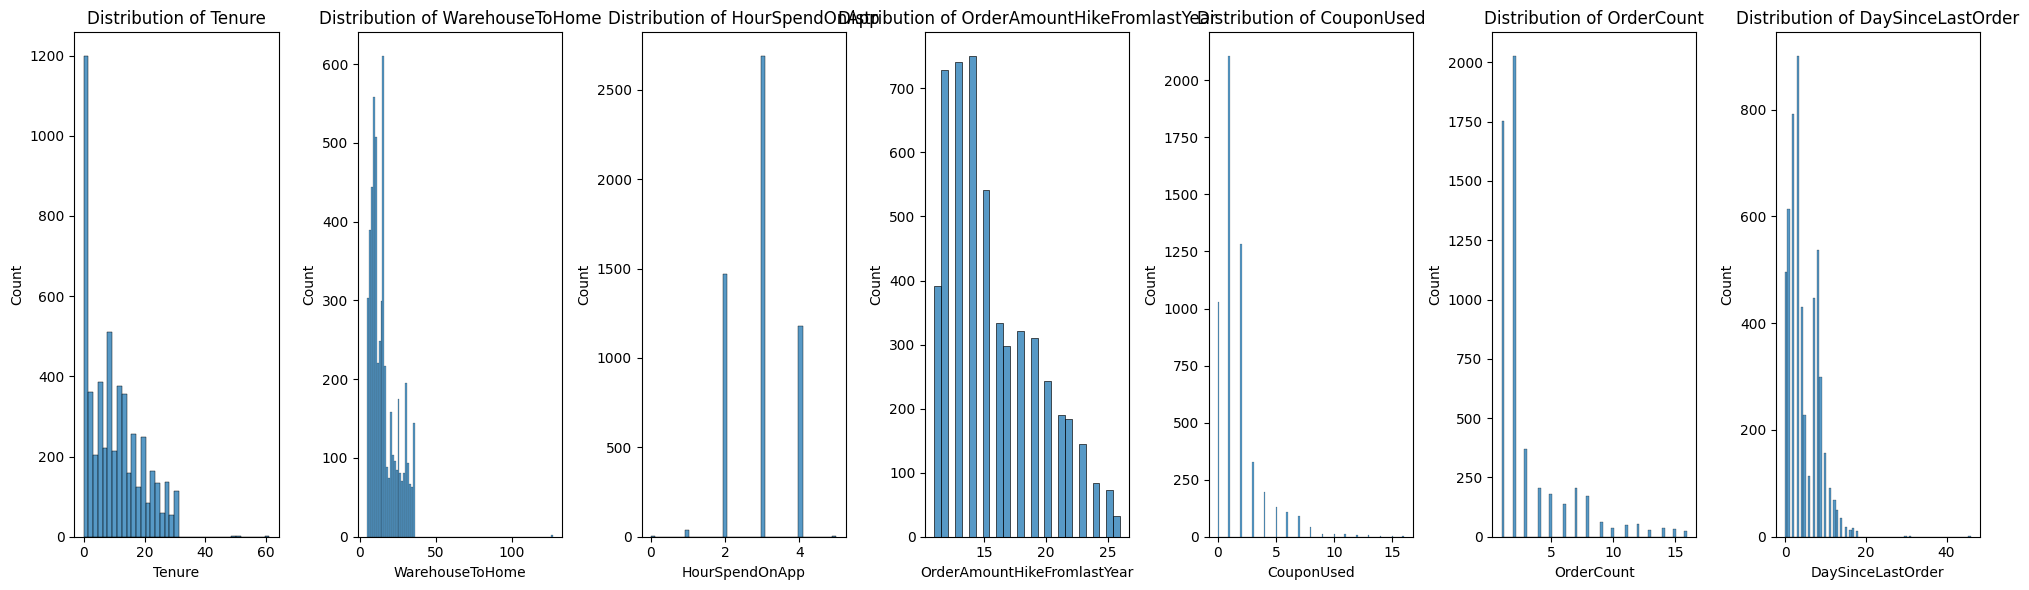

In [18]:
#Checking the distribution of all the columns with null values using Histogram.

num_cols = len(null_cols)
plt.figure(figsize=(20, 6))

for i, col in enumerate(null_cols,1):
    plt.subplot(1, num_cols, i)
    plt.title(f"Distribution of {col}")
    sns.histplot(data=df, x=col)

plt.tight_layout()
plt.show()

<font size=5>Filling all the null values of continuous variables with Median as the distribution of the variables are not Symmetric.<br>
Null values on Variable "Hour_Spend_On_App" is filled with mode as it is catergorical in nature.

In [19]:
Pre.fill_null_values(Train,cat,cont,cat_impute='mode',cont_impute='median')

In [20]:
#Checking null values after imputation
Train.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [21]:
#Checking if there is any duplicates in the data
Train.duplicated().unique()

array([False])

<font size=5>There are no duplicate values present in the data.

<font size=6><font color="greens">2. Analysis

<font size=5>&nbsp;&nbsp;2.1 Univariate Analysis

In [22]:
#Printing continuous and categorical varibales.
print(cont)
print(cat)

['CustomerID', 'Tenure', 'WarehouseToHome', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']


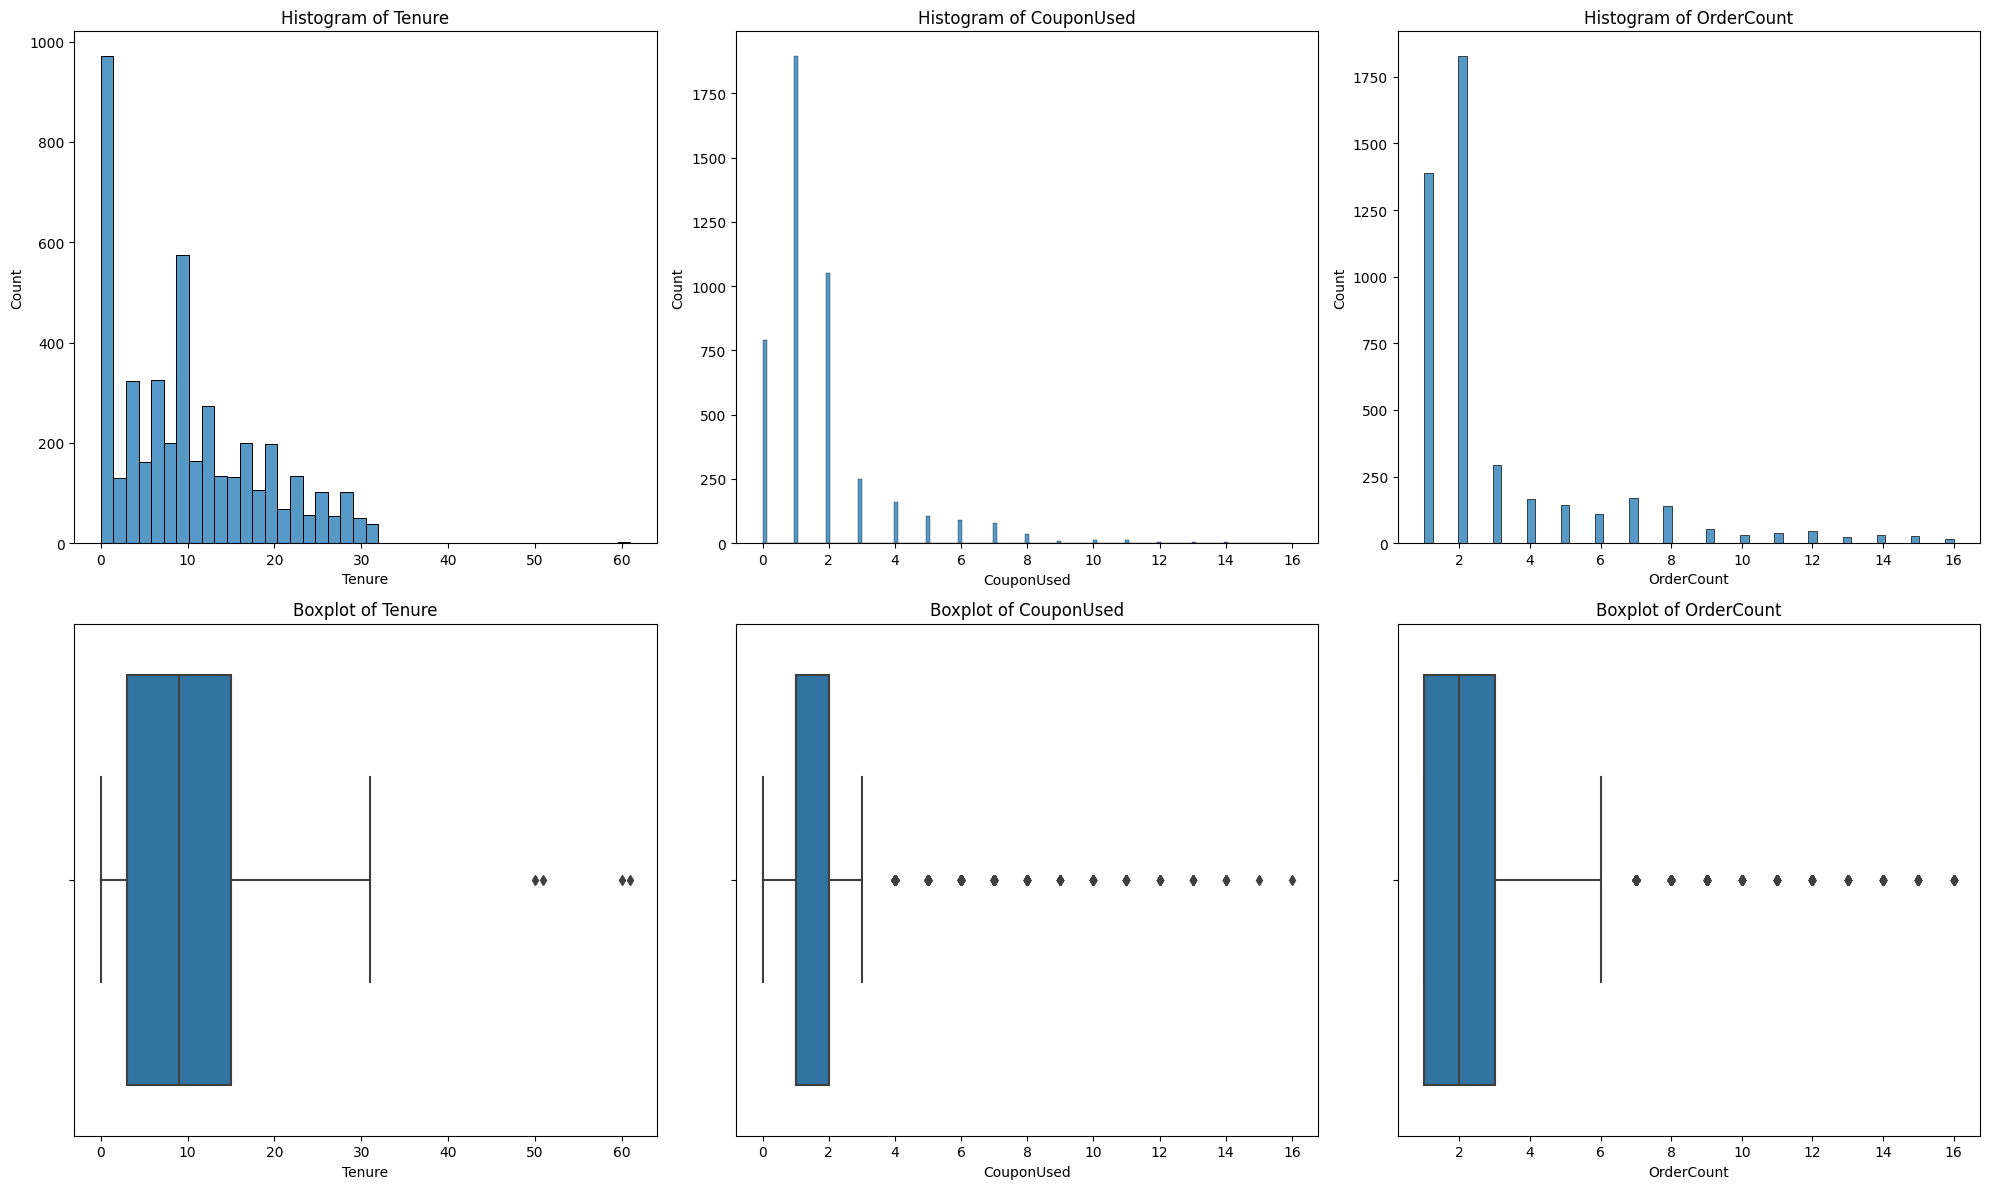

In [ ]:
# Histogram to represent the distribution frequency of the continuous variables.
# Boxplot to find the distribution of the continuous varibales and to find the outliers present.
Vis.Uni_analysis(Train,category=False)

**Interpretations**:<br>
<font size=4>1.) Highest Tenure of the customers is reported between 0-1 years, meaning that the range of time in which a customer is retained by a company is 0-1 years. However, there happens to be some outliers present.<br>
2.) It can be seen that most of the customers are using 1 coupon at the time of Purchase. There are lot of outliers present in the column.<br>
3.) Maximum number of orders placed in last month is 2, with a lot of outliers.

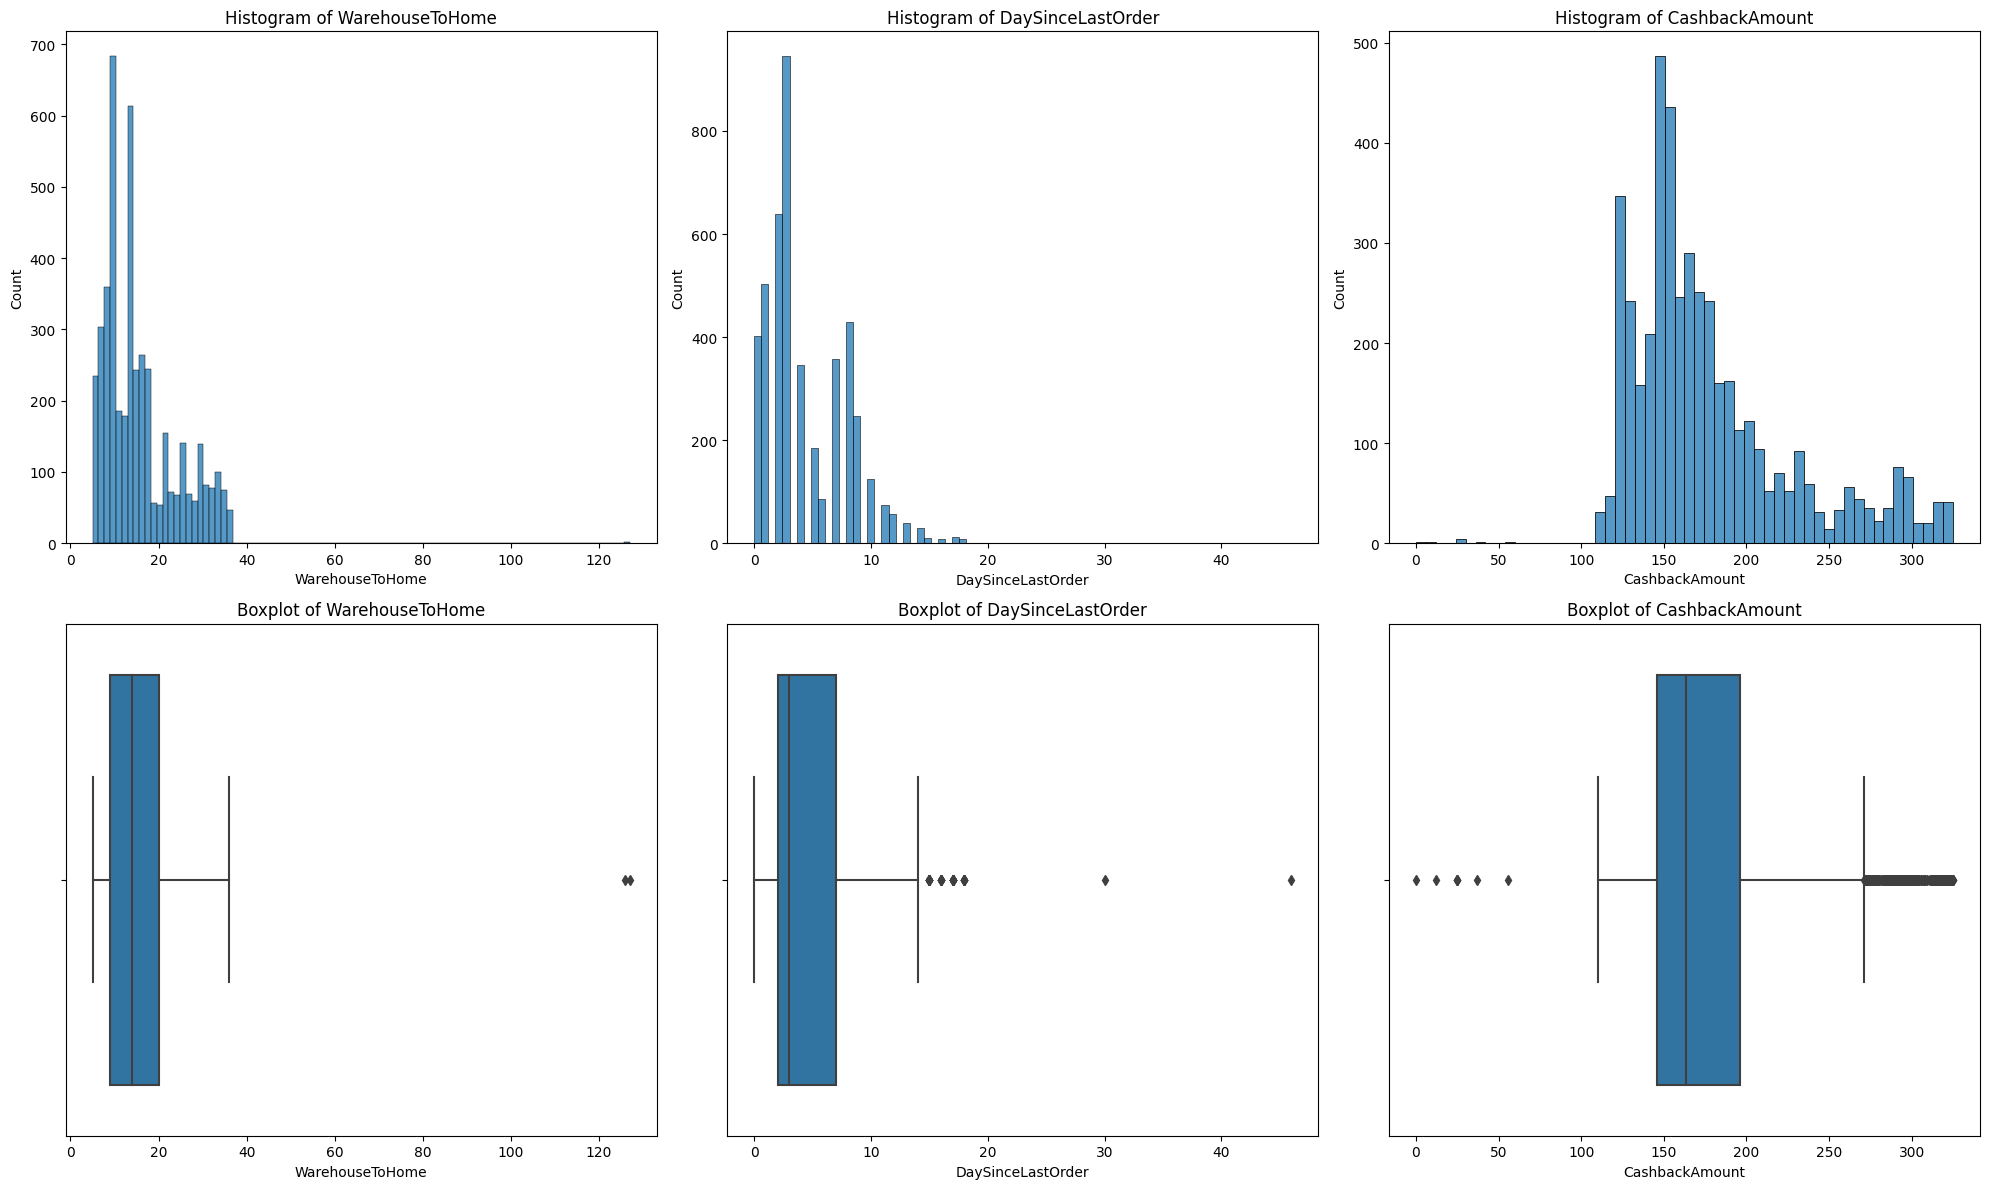

In [ ]:
# Histogram to represent the distribution frequency of the continuous variables.
# Boxplot to find the distribution of the continuous varibales and to find the outliers present.
Vis.Uni_analysis(Train,category=False)

**Interpretations:**</font><br>
<font size=4>1.) Maximum number of orders are placed by those customers who are staying upto a distance range of 7 to 9 Km from the warehouse.<br>
2.) Most of the customers haven't ordered anything for the last 3 days with some outliers present.<br>
3.) Maximum customers are getting a cashback amount between 120 to 155 with a lot of outliers.


In [ ]:
# Checking the unique categories of all the categorical variables for Bivariate analysis. 
unique_var(Train,cat)

Unique categories of Churn are:  [0 1]
Unique categories of PreferredLoginDevice are:  ['Mobile Phone' 'Computer']
Unique categories of CityTier are:  [1 2 3]
Unique categories of PreferredPaymentMode are:  ['Debit Card' 'Credit Card' 'Cash on Delivery' 'UPI' 'E wallet']
Unique categories of Gender are:  ['Female' 'Male']
Unique categories of HourSpendOnApp are:  [ 3.  4. nan  2.  0.  1.  5.]
Unique categories of NumberOfDeviceRegistered are:  [4 5 3 2 1 6]
Unique categories of PreferedOrderCat are:  ['Mobile Phone' 'Laptop & Accessory' 'Fashion' 'Grocery' 'Others']
Unique categories of SatisfactionScore are:  [4 3 2 1 5]
Unique categories of MaritalStatus are:  ['Single' 'Divorced' 'Married']
Unique categories of Complain are:  [1 0]


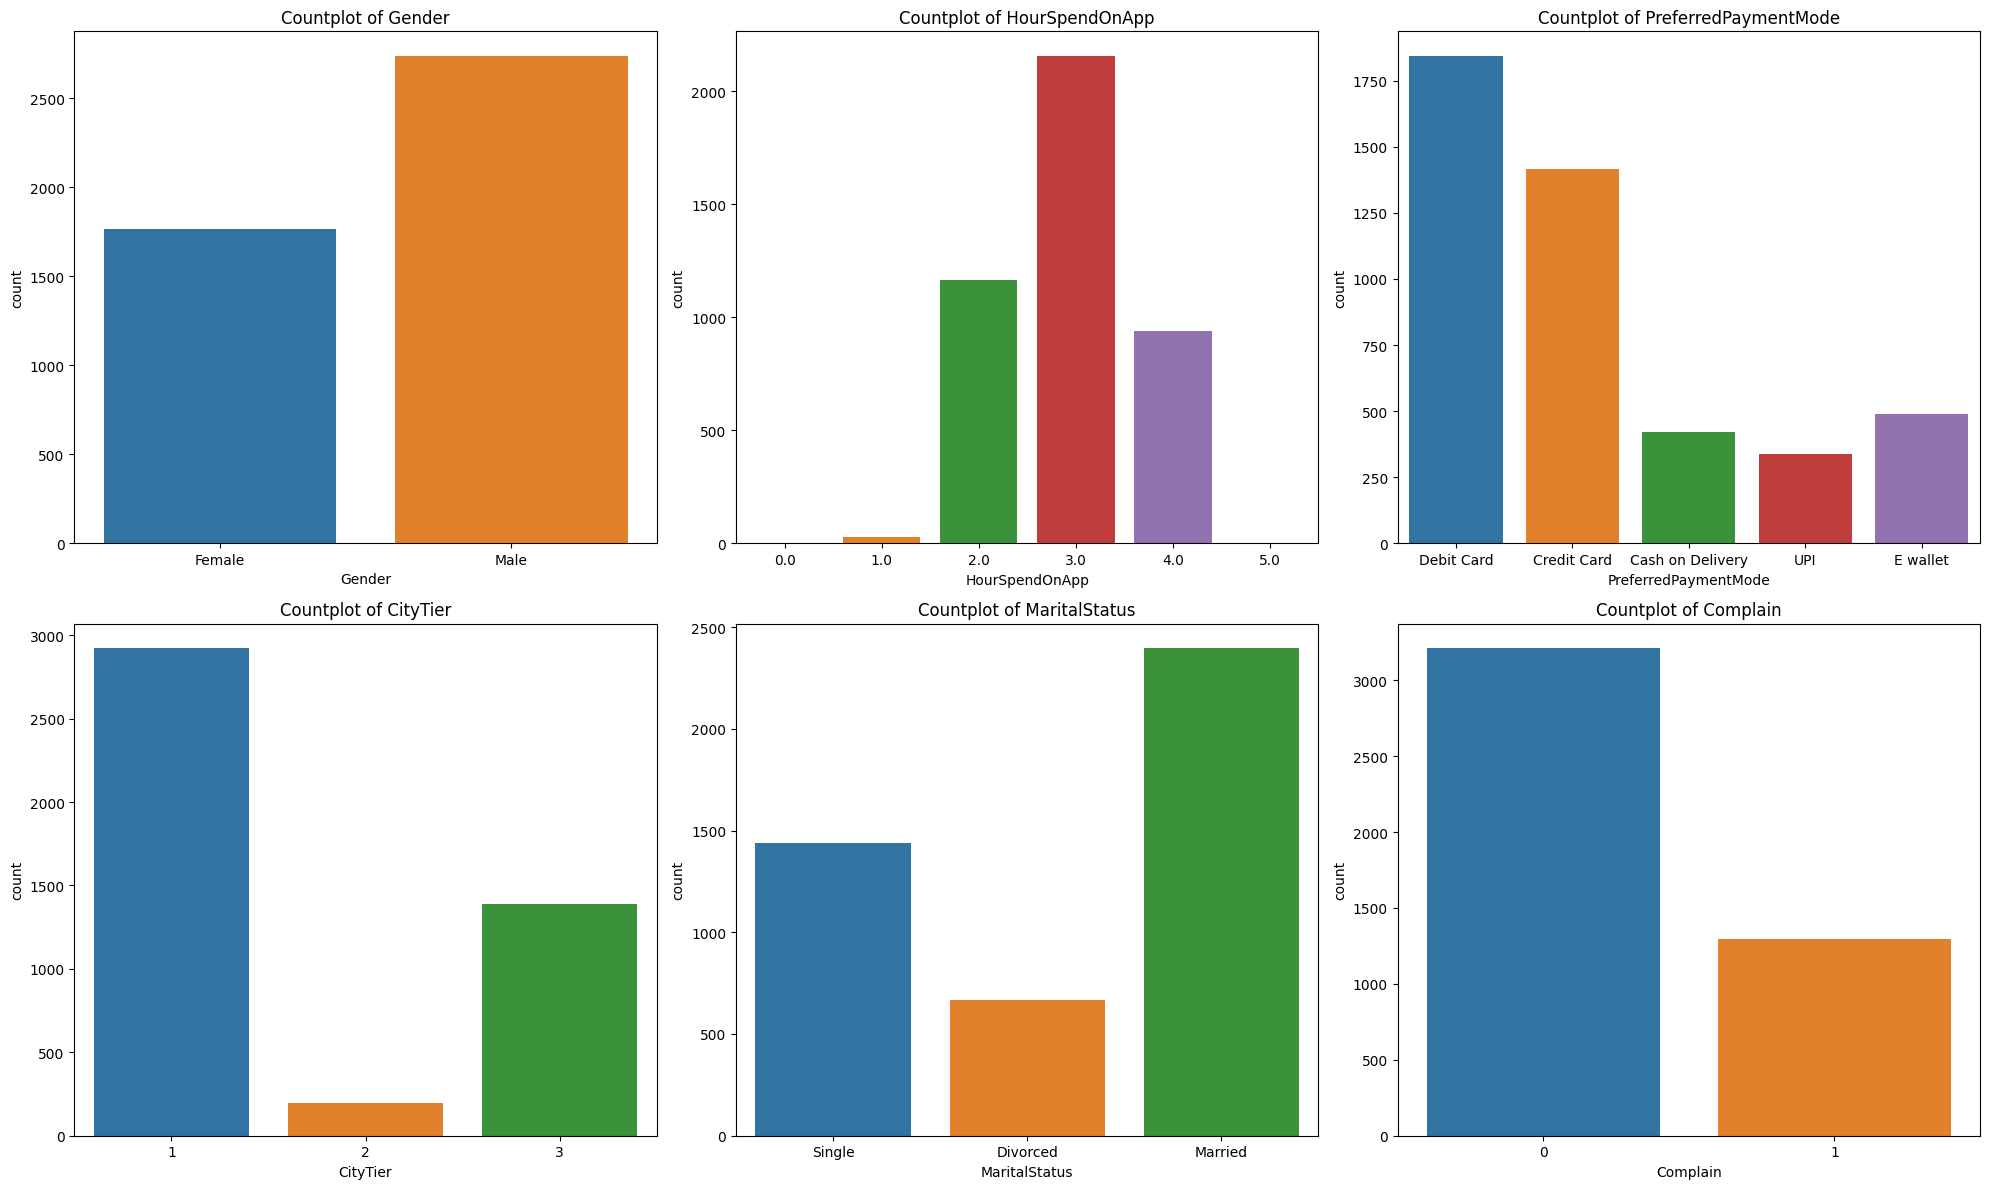

In [ ]:
# Countplot to find the frequency of each category present in a categorical variable.
Vis.Uni_analysis(Train,category=True)

**Interpretations:**<br>
1.) The data infers that out of the 4504 customers, males have the highest count of being a customer as compared to females.<br>
2.) The maximum time a customer is spending on the company's app is 3 hours.<br>
3.) Most of the customers prefer debit card as their mode of payment.<br>
4.) The analysis shows that a majority of customers reside in tier 1 cities, while the lowest number of customers are from tier 2 cities.<br>
5.) The data indicates that most customers are married, while the fewest are divorced.<br>
6.) No complaints have been raised by the maximum customers, which could mean that maximum customers are happy with the services provided by the company.<br>

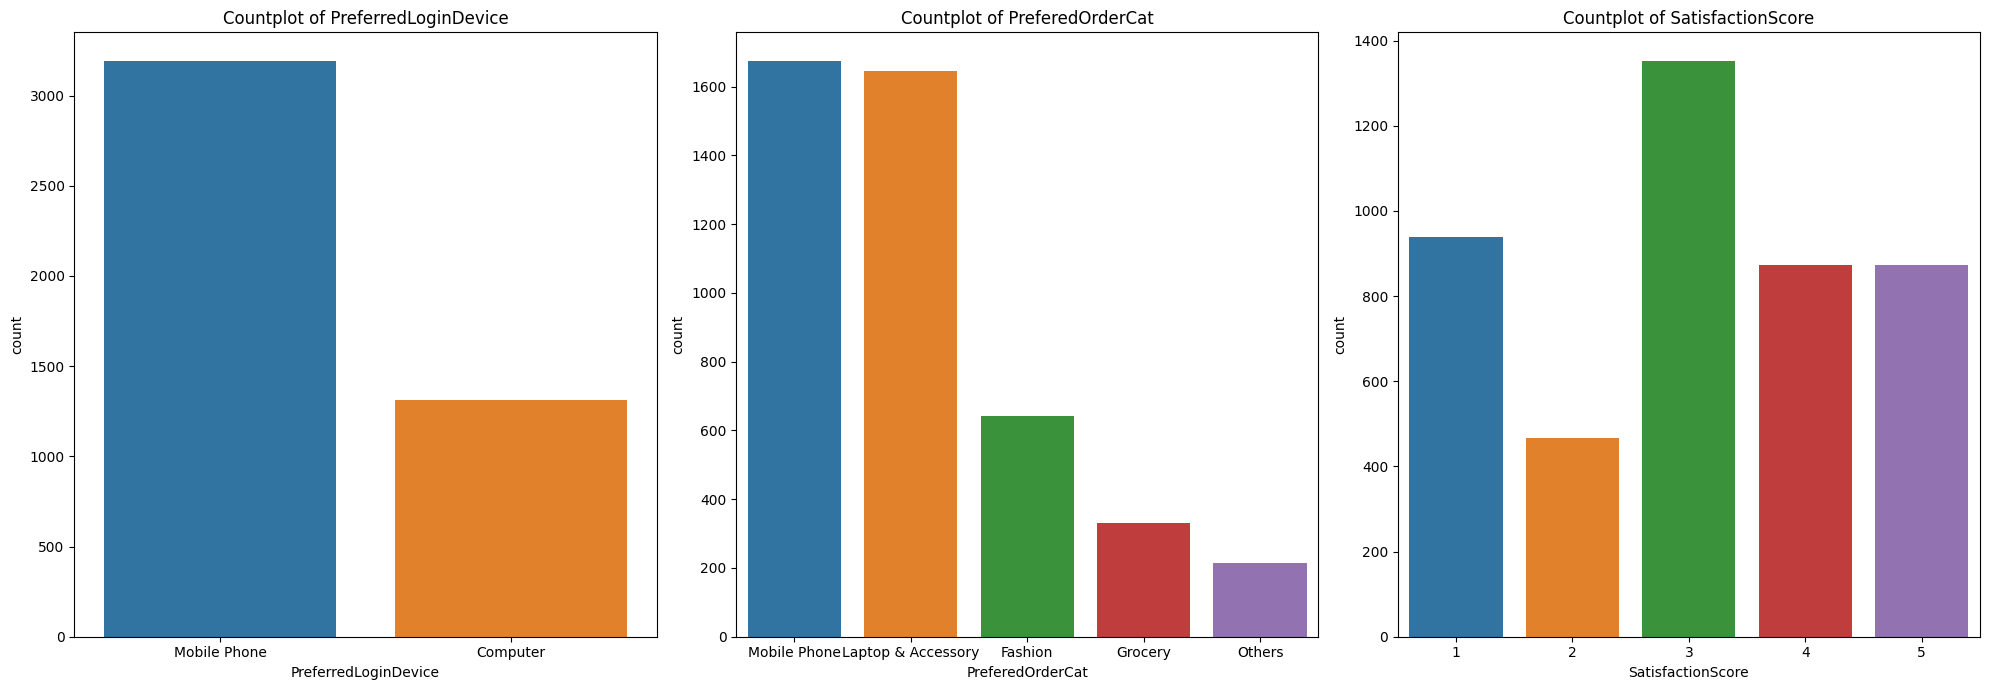

In [ ]:
# Countplot to find the frequency of each category present in a categorical variable.
Vis.Uni_analysis(Train,category=True)

**Interpretations:**<br>
1.) Maximum customers prefer using Mobile Phone to access the company's app or website to place orders.<br>
2.) The data highlights that the most popular category among customers in the last month is "Mobile Phone" and "Laptop & Accessory", suggesting a significant level of interest in these product categories.<br>
3.) On an average, customer's satisfaction score can be seen as 3, which could mean that customers tend to have a moderately positive level of satisfaction with the company's services.
____

<font size=5>&nbsp;&nbsp;2.2 Bivariate Analysis

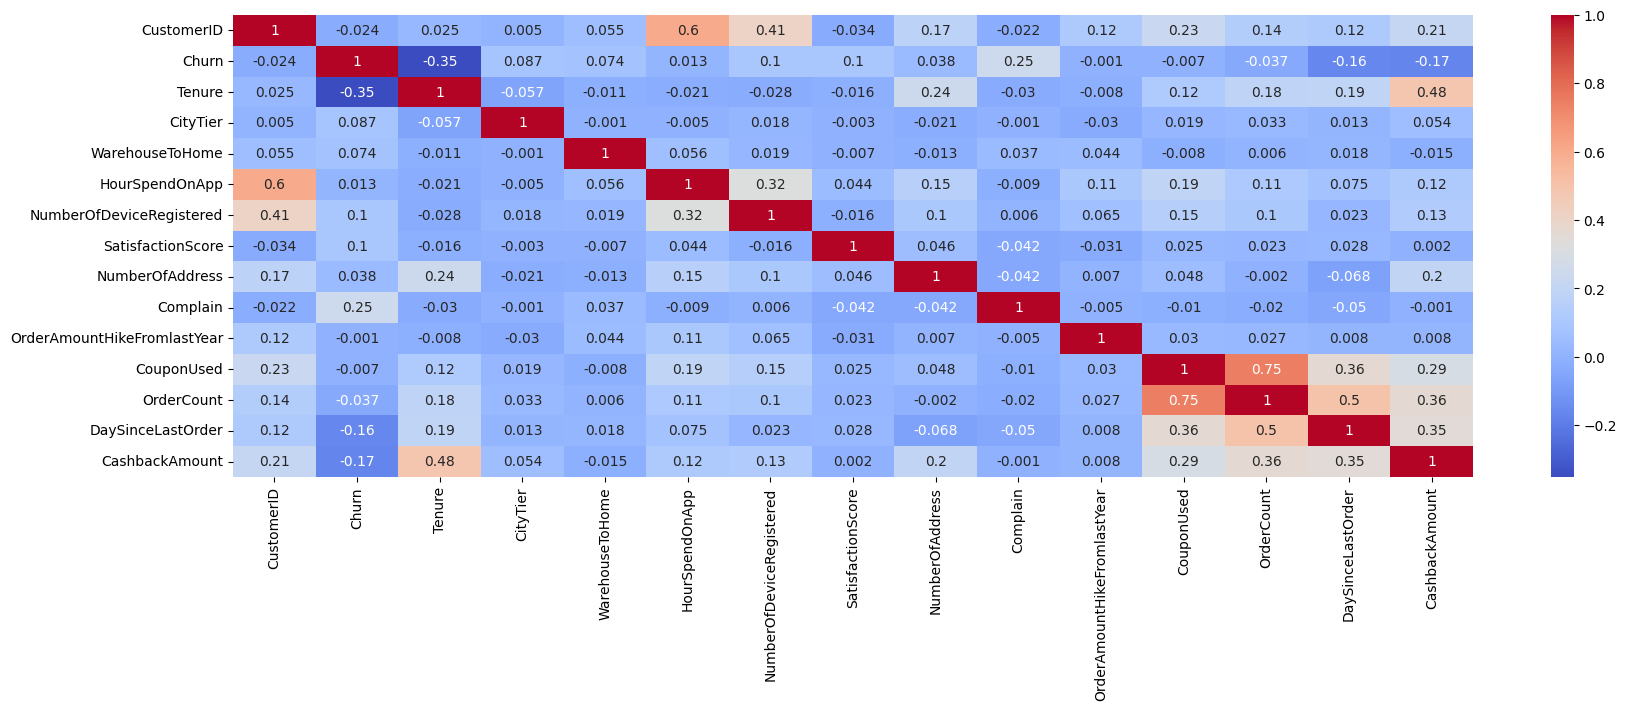

In [ ]:
# Correlation Coefficients of all the continuous variables.
plt.figure(figsize=(20,6))
sns.heatmap(round(Train.corr(numeric_only=True),3),annot=True,cmap="coolwarm")
plt.show()

Interpretations:<br>
1.) The target variable "Churn" shows weak positive correlations with variable "Complain" and a weaker inverse correlation with the variable "CashbackAmount". This suggests that customers who have previously made complaints, received less cashback may have a slightly higher chances of churning.<br>
2.) The highest correlation coefficient is reported as 0.65 between the variables "CouponUsed" and "OrderCount", indicating a positive correlation, which could mean that as customers are using more number of coupons, the number of orders placed also increases.

<font size=5>Visualization of the relationship between the mentioned variables using Scatterplot.

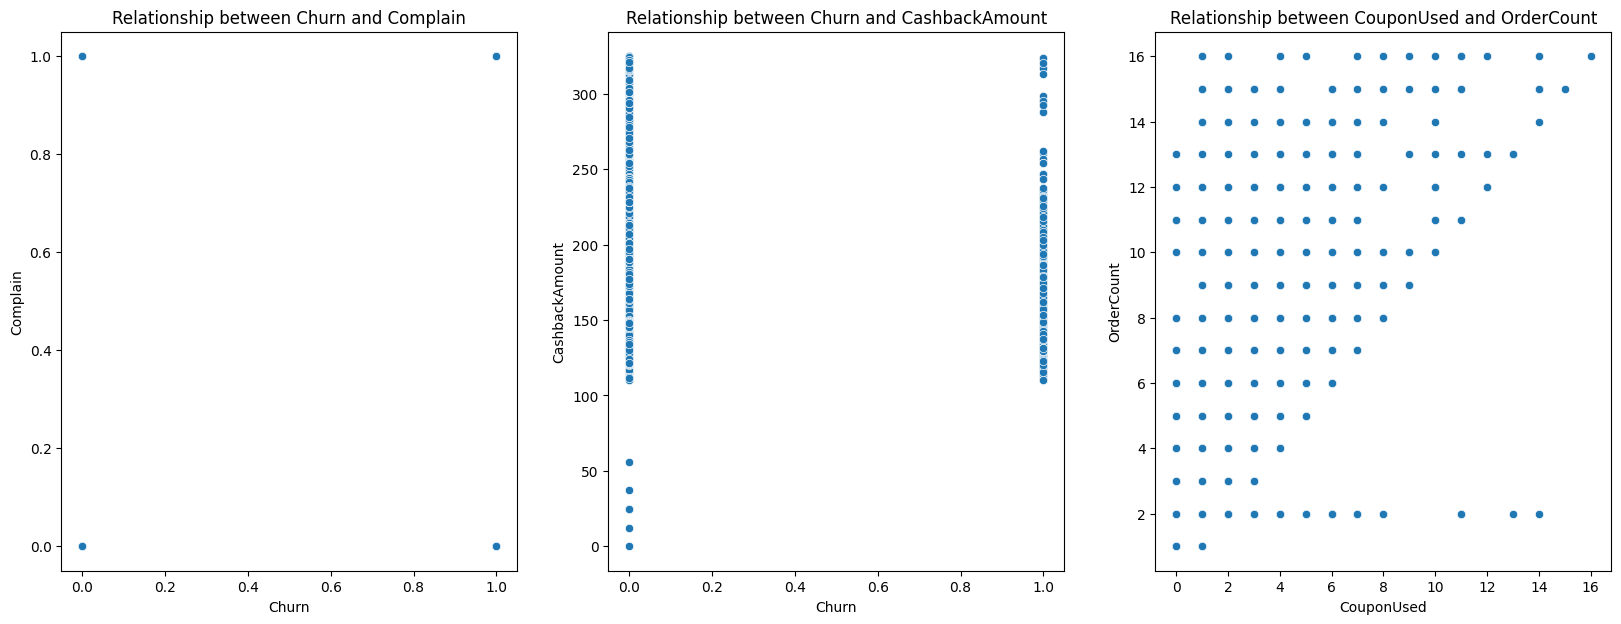

In [ ]:
Vis.Bi_analysis(Train)

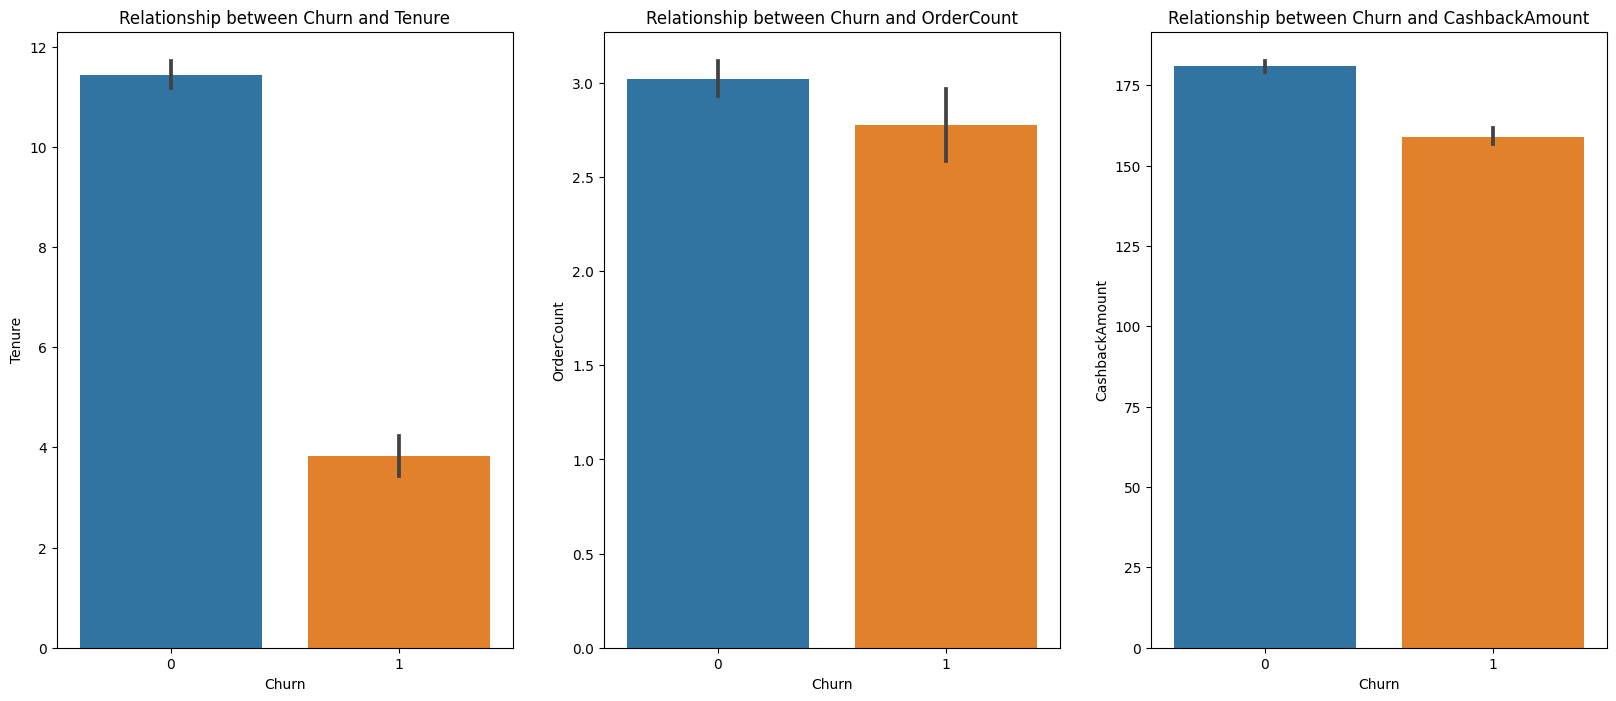

In [ ]:
# Barplot to show relationship between Categorical (Dependent) variable and continuous variables.
Vis.Bi_analysis(Train)

Interpretation:<br>
1.) The Data infers that the customers who are not churning have the highest tenure, which means that the customers who are not churning, maintains a good and long relation with the company.<br>
2.) The customers who are not churning as well as the customers who are churning have almost the same number of order count.<br>
3.) The Data also shows are the customers who are not churning are getting little higher cashback amounts as compared to those who are churning.<br>

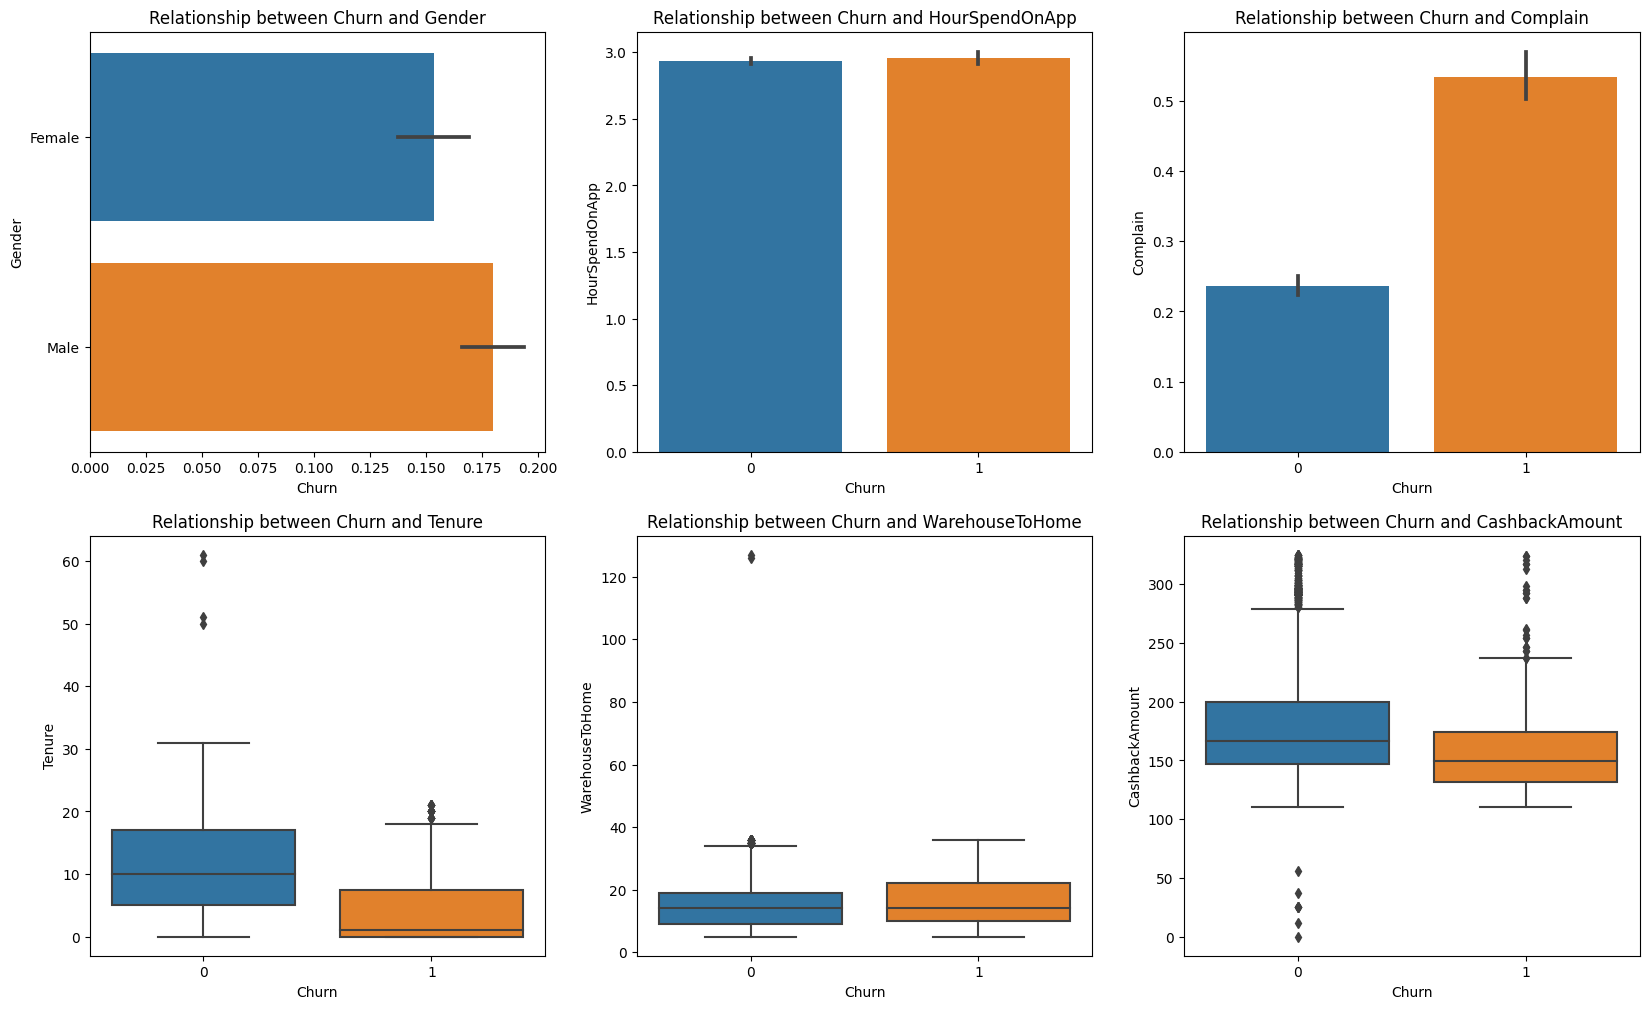

In [ ]:
# Barplot and boxplot to find the relationship between categorical to categorical variables and categorical to continuous variables.
Vis.Bi_analysis(Train)

**Interpretations:**<br>
1.) The data indicates that males are more likely to be churned as compared to the females.<br>
2.) It seems that the customers who are churning as well as the customers who are not churning are spending the same amount of time on the company's app.<br>
3.) The data also infers that there is a high gap between the complaints registered by the customers who are churning and those who are not. Customers who are churning have the highest number of complaints registered.<br>
4.) The median of 'Tenure' is higher for the customers who are not churning as compared to those who are churning, which infers that longer tenured customers are less likely to churn.<br>
5.) The median of 'Cashback Amount' is slighlt higher for the customers who are not churning as compared to those who are churning, which also indicates that customers getting higher cashback amounts are less likely to churn.<br>
6.) The median of 'Warehouse to home' is the same in both the case. This means that the shipping time might not be a factor influencing customers decisions to churn.

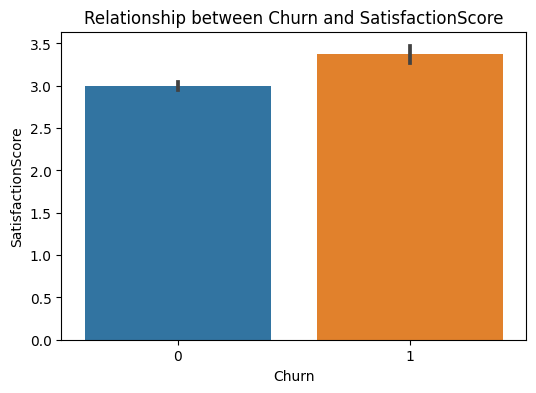

In [ ]:
Vis.Bi_analysis(Train)

<font size=4>It seems that SatisfactionScore does not signify the relationship with 'Churn' as it can be seen that customers who are churning have higher satisfaction score than those customers who are not churning, Which could mean that the services of the company is having a good impact on the customers.
_________

<font size=5>&nbsp;&nbsp;2.3 Multivariate Analysis

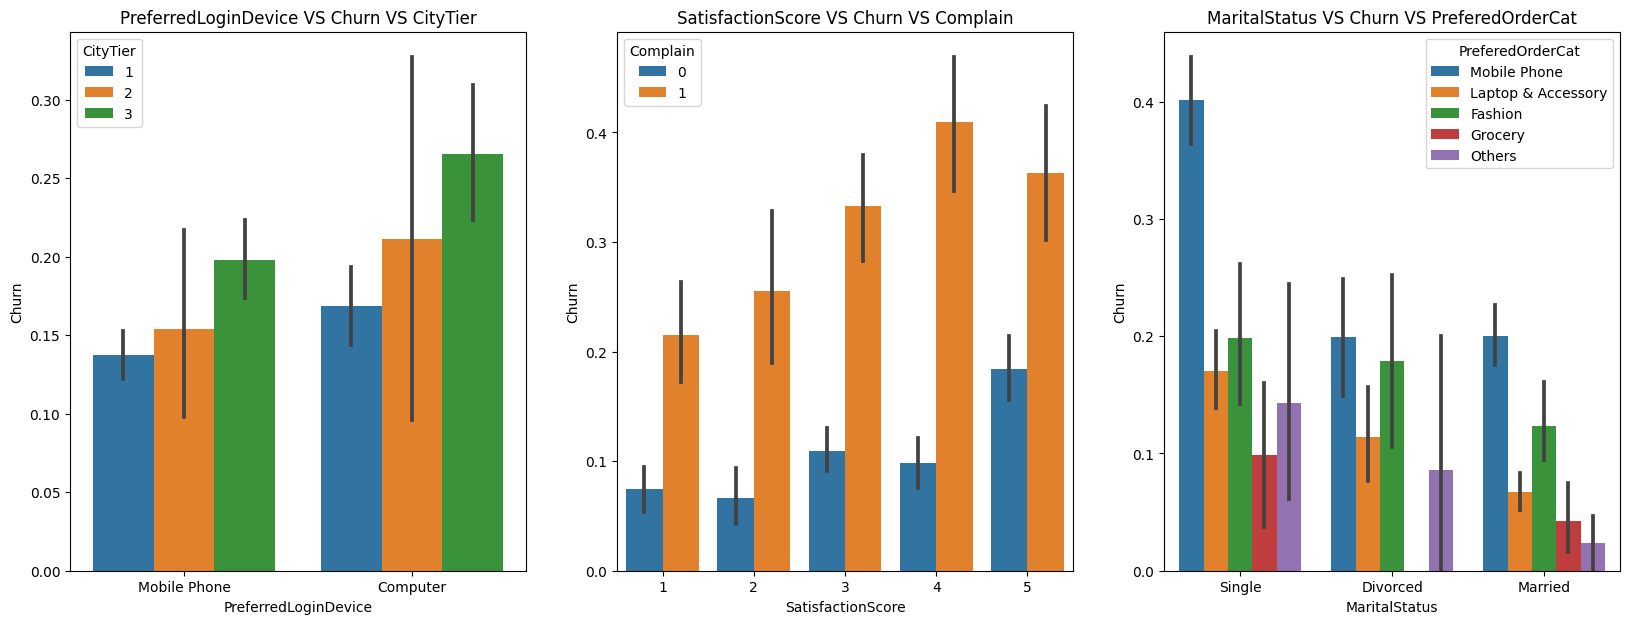

In [ ]:
Vis.Mul_analysis(Train)

Interpretations:<br>
1.) It can be seen that maximum customers having Computer as their preferred login device and belonging to City Tier 2 and 3 are the ones who have highest churn rate.<br>
2.) Customers who rate their satisfaction as 4 and have registered complaints against the company demonstrate the highest churn rate. This suggests that although these customers are generally satisfied with the company, the company's ability to address their complaints may be lacking, leading to the high churn rate.<br>
3.) Out of the marital status of the customers, customers who are single and their Preferred order category happens to be Mobile Phone have the highest churn rate.
_____

**<font size=5>Overall Summary of the Analysis...<br>**

**<font size=4>Problem Statement**: An online retail (E-commerce) company aims to identify customers who are likely to churn to proactively intervene with targeted promotions and retain their valuable customer base.<br>

**<font size=4>Summary:**<br>
Through Exploratory data analysis, I examined various aspects of the customer dataset to understand churn behavior and factors influencing it. Using Univariate analysis, it revealed the key characteristics of customers, such as tenure, coupon usage, order count, and preferred payment modes. Bivariate analysis inferred relationships between churn and variables like complaints, cashback amount, and customer satisfaction scores. And multivariate analysis helped in finding relationship among multiple factors, which revealed the impact of preferred login devices, city tiers, satisfaction score, marital status, complaints and preferred order categories on churn rate.

**<font size=4>Conclusions:**<br>
1.) Customer Characteristics: The analysis revealed that the maximum number of orders placed in the last month is 2, with several outliers present. Debit card is the preferred mode of payment among the majority of customers. Most customers reside in Tier 1 cities, while the fewest are from Tier 2 cities. The dataset primarily consists of married customers, while the fewest are divorced.<br>
2.) Complaints and Churn: Customers giving a satisfaction score of 4 with registered complaints demonstrate the highest churn rate, highlighting the importance of resolving issues to retain satisfied customers.<br>
3.) Tenure and Cashback: Longer tenured customers and those receiving higher cashback amounts are less likely to churn, suggesting the importance of long lasting relationships and higher rewards.<br>
4.) Gender and Churn: Male customers have a higher churn rate as compared to females, indicating gender-related factors in churn behavior.

**<font size=4>Recommendations:**<br>
Based on the analysis, I can recommend the E-commerce company to take the following actions to reduce the churn rate:<br>
1.) Improve Customer Support: Increase complaint resolution process and address registered complaints quickly to boost customer satisfaction.<br>
2.) Cashback Incentives: Offer targeted cashback amounts to specific customer segments, encouraging higher retention rates.<br>
3.) Customer Segmentation: Use customer segmentation strategies to understand preferences of different segments, such as single customers who prefer mobile phones category, and provide services accordingly to increase customer retention. 

<font size=6><font color="yellow">3. Detecting And Treating Outliers

<font size=5>&nbsp;&nbsp;3.1 Detecting Outliers

In [ ]:
cols_with_outliers=Pre.detect_outliers(Train,cont, method="IQR")
cols_with_outliers

['Tenure',
 'WarehouseToHome',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

<font size=4>The above mentioned columns have outliers which is detected using a function with method selected as z score.

<font size=5>&nbsp;&nbsp;3.2 Treating Outliers

In [ ]:
Train=Pre.treat_outliers_iqr(Train,cols_with_outliers)

<font size=4>Defined a function to treat all the outliers present in the data using capping technique.

In [ ]:
# Checking again if there are still outliers present in the data.
outliers_check=Pre.detect_outliers(Train,cont,method="IQR")
outliers_check

[]

<font size=4>Empty list indicates that all the outliers have been treated from the dataset.
_____

<font size=6><font color="pink">4. Hypothesis Testing

<font size=4>After cleaning, analyzing and treating outliers present in the data, the next step is to perform hypothesis testing to check if the independent variables have any significance or relation with the dependent variable i.e "Churn"

<font size=4>Before performing hypothesis testing, I ensure that all the categorical variables are in numerical format.<br>
So, assigning unique numbers to all the categories present in the categorical varibales using a function.

In [ ]:
# Fitted the encoders in a dictionary to transform the fitted encoders in the Train data as well as Test data.
fitted_encoders=Pre.label_encode(Train)

In [ ]:
# Transformed the fitted encoders to Train data
Train=Pre.encoder_transform(Train,fitted_encoders)

In [ ]:
print(fitted_encoders)

{'PreferredLoginDevice': LabelEncoder(), 'PreferredPaymentMode': LabelEncoder(), 'Gender': LabelEncoder(), 'PreferedOrderCat': LabelEncoder(), 'MaritalStatus': LabelEncoder()}


In [ ]:
# Checking all the encoded values assigned through label encoding.
for col, encoder in fitted_encoders.items():
    category_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(f"Category mapping for '{col}':")
    print(category_mapping)
    print()

Category mapping for 'PreferredLoginDevice':
{'Computer': 0, 'Mobile Phone': 1}

Category mapping for 'PreferredPaymentMode':
{'Cash on Delivery': 0, 'Credit Card': 1, 'Debit Card': 2, 'E wallet': 3, 'UPI': 4}

Category mapping for 'Gender':
{'Female': 0, 'Male': 1}

Category mapping for 'PreferedOrderCat':
{'Fashion': 0, 'Grocery': 1, 'Laptop & Accessory': 2, 'Mobile Phone': 3, 'Others': 4}

Category mapping for 'MaritalStatus':
{'Divorced': 0, 'Married': 1, 'Single': 2}



In [ ]:
# Checking if all the variables are now in numerical format, so that I can perform the hypothesis testing.
Train.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4478,54479,0,1.0,1,1,12.0,2,0,3.0,4,3,4,2,3.0,1,13.0,1.0,2.0,3.0,149.78
3685,53686,0,17.0,1,1,13.0,1,0,4.0,5,2,3,2,3.0,1,15.0,2.0,2.0,9.0,165.81
731,50732,0,0.0,1,1,9.0,2,1,3.0,4,3,3,2,2.0,0,12.0,0.0,1.0,2.0,130.33
291,50292,0,9.0,0,1,8.0,2,1,2.0,3,3,2,0,2.0,1,23.0,1.0,1.0,0.0,117.02
184,50185,0,4.0,1,1,11.0,0,1,2.0,3,3,2,0,1.0,1,12.0,0.0,1.0,3.0,148.21


<font size=5>&nbsp;&nbsp;4.1 Performing Hypothesis

In [24]:
Pre.perform_hypothesis(Train,cat,cont,"Churn")

Null= PreferredLoginDevice has no significant effect on Churn
Alternate= PreferredLoginDevice has significant effect on Churn
Test : Chi-square Test , p-value : 0.0004609047505413924
Reject null 

Null= CityTier has no significant effect on Churn
Alternate= CityTier has significant effect on Churn
Test : Chi-square Test , p-value : 4.2562742543290234e-08
Reject null 

Null= PreferredPaymentMode has no significant effect on Churn
Alternate= PreferredPaymentMode has significant effect on Churn
Test : Chi-square Test , p-value : 6.730015247252635e-07
Reject null 

Null= Gender has no significant effect on Churn
Alternate= Gender has significant effect on Churn
Test : Chi-square Test , p-value : 0.0243690556017265
Reject null 

Null= HourSpendOnApp has no significant effect on Churn
Alternate= HourSpendOnApp has significant effect on Churn
Test : Chi-square Test , p-value : 0.20253182186427493
Accept null 

Null= NumberOfDeviceRegistered has no significant effect on Churn
Alternate= Number